- Action
    - 0 is do nothing
    - 1 is right thruster
    - 2 is main thruster
    - 3 is left thruster
- Observation
    - x, y, vx, vy, theta, vtheta(w), leg 1 ground contact, leg 2 ground contact
- Rewards
    - increased/decreased distance from pad
    - inc/dec lander slower/faster speed
    - dec the more tilted lander is
    - inc by 10 for each leg on ground
    - dec by 0.03 each side engine fires
    - dec by 0.3 for main engine
    - 100 inc for landing safely
    - 100 dec for crashing
- Start state
    - top center with random force perturbation
- Termination
    - lander crashes
    - lander leaves view
    - lander is not awake
        - body that doesnt move or collide

In [3]:

import gymnasium as gym
from src.basic_agent import BasicAgent
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# env = gym.make("LunarLander-v2", render_mode="human")
env = gym.make("LunarLander-v2")
observation, info = env.reset()
# Action
# 0 is do nothing
# 1 is right thruster
# 2 is main thruster
# 3 is left thruster
agent1 = BasicAgent(print_mode=False)
action = agent1.start_step()
reward_hist = []
batch_hist = []
total_reward = 0
batch_reward = 0
ep_steps = 0
batch = 50
for _ in range(1500000):
    # if _ % 100 == 0:
    #    print(_)
    # action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    # print(f"X={observation[0]}, Y={observation[1]}")
    ep_steps += 1
    # print(observation[5])
    if terminated or truncated:
        reward = agent1.terminal_step(observation, reward)
        total_reward += reward
        reward_hist.append(total_reward/ep_steps)
        total_reward = 0
        ep_steps = 0
        observation, info = env.reset()
        action = agent1.start_step()
    else:
        action, reward = agent1.step(observation, reward)
        total_reward += reward
    # print(reward_hist)
env.close()
bval = 0
b_iter = 1
for val in reward_hist:
    b_iter += 1
    if (b_iter % batch) != 0:
        bval += val
    else:
        bval = bval/batch
        batch_hist.append(bval)
        bval = 0
plt.plot(batch_hist)
plt.title("Agent Avg Reward over Episode")
plt.xlabel("Episode")
plt.ylabel("Avg Reward")
plt.show()

RepNum: 0
RepNum: 1
RepNum: 2
RepNum: 3
RepNum: 4
RepNum: 5
RepNum: 6
RepNum: 7
RepNum: 8
RepNum: 9
RepNum: 10
RepNum: 11
RepNum: 12
RepNum: 13
RepNum: 14


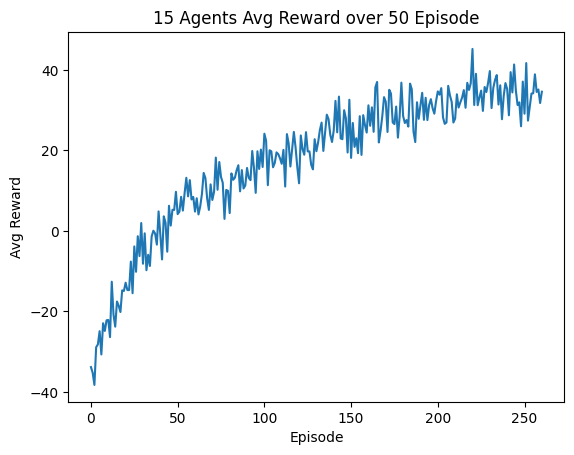

In [37]:

# Action
# 0 is do nothing
# 1 is right thruster
# 2 is main thruster
# 3 is left thruster
reward_hists = []
reps = 15
for rep in range(reps):
    env = gym.make("LunarLander-v2")
    observation, info = env.reset()
    agent = BasicAgent()
    action = agent.start_step()
    reward_hist = []
    total_reward = 0
    ep_steps = 0
    ep_id = 0
    print("RepNum:", rep)
    for _ in range(1500000):
        # action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)
        ep_steps += 1
        # total_reward += reward
        # print(observation[5])
        if terminated or truncated:
            ep_id += 1
            reward = agent.terminal_step(observation, reward)
            total_reward += reward
            reward_hist.append(total_reward/ep_steps)
            total_reward = 0
            ep_steps = 0
            observation, info = env.reset()
            action = agent.start_step()
        else:
            action, reward = agent.step(observation, reward)
            total_reward += reward

    reward_hists.append(reward_hist)

# reward_hist = np.asarray(reward_hist)/np.asarray(reward_count)

min_len = 0
first = True
for hist in reward_hists:
    hist_len = len(hist)
    if first:
        first = False
        min_len = hist_len
    else:
        if hist_len < min_len:
            min_len = hist_len

avg_reward_hist = []
for i in range(min_len):
    cummu_reward = 0
    for hist in reward_hists:
        cummu_reward += hist[i]
    cummu_reward = cummu_reward/reps
    avg_reward_hist.append(cummu_reward)



batch_hist = []
batch = 50
bval = 0
b_iter = 1
for val in avg_reward_hist:
    b_iter += 1
    if (b_iter % batch) != 0:
        bval += val
    else:
        bval = bval/batch
        batch_hist.append(bval)
        bval = 0

plt.plot(batch_hist)
plt.title(f"{reps} Agents Avg Reward over {batch} Episode")
plt.xlabel("Episode")
plt.ylabel("Avg Reward")
plt.show()

In [30]:

env = gym.make("LunarLander-v2")
observation, info = env.reset()
agent = BasicAgent()
action = agent.start_step()
for _ in range(1500000):
    if _ % 100000 == 0:
        print(_)
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        agent.terminal_step(observation, reward)
        observation, info = env.reset()
        action = agent.start_step()
    else:
        action, reward = agent.step(observation, reward)
env.close()

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000


In [41]:

env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()
agent.toggle_print()
action = agent.start_step()
for _ in range(5000):
    # action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    # print(observation[5])
    if terminated or truncated:
        agent.terminal_step(observation, reward)
        observation, info = env.reset()
        action = agent.policy(observation)
    else:
        action = agent.policy(observation)
env.close()
agent.toggle_print()

hs_bl: vy=-0.4710231125354767, l1=1.0, l2=1.0
Crash: vy=-0.666391134262085, l1=1.0, l2=1.0
hs_1l: vy=-0.5603254437446594, l1=1.0, l2=0.0
Safe: vy=-0.015080803073942661, l1=1.0, l2=1.0
x=-0.44834375381469727
hs_bl: vy=-0.5815895795822144, l1=1.0, l2=1.0
hs_1l: vy=-0.4377903640270233, l1=1.0, l2=0.0
Crash: vy=0.2614014148712158, l1=1.0, l2=0.0
Safe: vy=-0.23056407272815704, l1=1.0, l2=1.0
x=-0.15354804694652557
Landed in goal as well
hs_1l: vy=-0.5552478432655334, l1=0.0, l2=1.0
Crash: vy=-0.7270365953445435, l1=1.0, l2=0.0
Safe: vy=-0.11452081054449081, l1=1.0, l2=1.0
x=0.6343995928764343
Safe: vy=-0.007211222779005766, l1=1.0, l2=1.0
x=0.4413471221923828
hs_1l: vy=-0.4360394775867462, l1=0.0, l2=1.0
hs_1l: vy=-0.5614970922470093, l1=0.0, l2=1.0
Crash: vy=1.6370904631912708e-08, l1=0.0, l2=0.0
hs_bl: vy=-0.3318772315979004, l1=1.0, l2=1.0
Safe: vy=-0.10551641136407852, l1=1.0, l2=1.0
x=0.2778204083442688
Safe: vy=-5.521851775824871e-08, l1=1.0, l2=1.0
x=0.10692520439624786
Landed in goa

In [33]:
len(reward_hists)

15

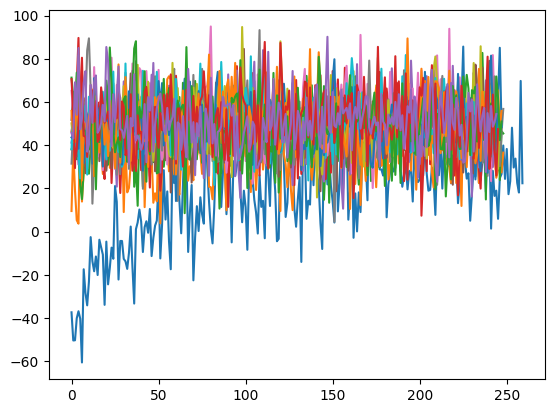

In [36]:

batch_hist = []
batch = 50
bval = 0
b_iter = 1
for hist in reward_hists:
    batch_hist = []
    batch = 50
    bval = 0
    b_iter = 1
    for val in hist:
        b_iter += 1
        if (b_iter % batch) != 0:
            bval += val
        else:
            bval = bval/batch
            batch_hist.append(bval)
            bval = 0

    plt.plot(batch_hist)

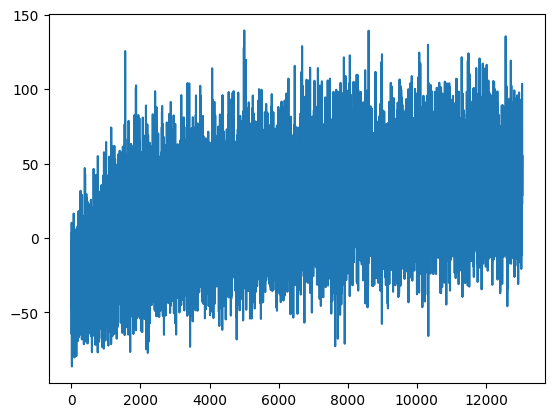

In [38]:
plt.plot(avg_reward_hist)